<a href="https://colab.research.google.com/github/jtrahan1029/jtrahan1029/blob/main/Unsupervised_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  import tmtoolkit
except:
  !pip install -U "tmtoolkit[recommended]"
  import tmtoolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 7.0 MB/s eta 0:00:00
  Created wheel for globre: filename=globre-0.1.5-py3-none-any.whl size=19545 sha256=b9eb4b8278e402d733a715e371113e2eb058ae70876bea34ecb9ab86dae67ede
  Stored in directory: /root/.cache/pip/wheels/e6/c5/26/0d27e07d567b3b4e63a618efff19a2cdbab636ac1295d20206
Successfully built globre


In [2]:
import os
import nltk
import random
import numpy as np
from tmtoolkit.corpus import Corpus, corpus_add_tabular
import json
import pickle
import scipy.sparse
import pandas as pd
# Enable logging to see the progress of long-running operations
from tmtoolkit.utils import enable_logging
from tmtoolkit.corpus import Corpus, print_summary

enable_logging()


random.seed(20191120)   # to make the sampling reproducible
np.set_printoptions(precision=5)

In [3]:
import json
import gzip
import pickle
import json
import pandas as pd

working_directory = '/content/drive/MyDrive/Colab_Notebooks/files'

In [4]:
with gzip.open("/content/drive/MyDrive/Colab_Notebooks/files/meta_Clothing_Shoes_and_Jewelry.jsonl.gz") as products:
    for product in products:
        data = json.loads(product)

working_file = '%s/meta_Clothing_Shoes_and_Jewelry.jsonl.gz' % working_directory
loadedjson = gzip.open(working_file, 'r')

In [5]:
allproducts = {}
count = 0

for aline in loadedjson:

    count += 1
    if count % 100000 == 0:
        print(count)

    # loads a dictionary from string
    aproduct = eval(aline)

    allproducts[aproduct['asin']] = aproduct

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000


In [6]:
allnikeasins = set()
count = 0

for areview in allproducts:
    theproduct = allproducts[areview]
    count += 1
    if count % 100000 == 0:
        print(count/1503384)

    for categories in theproduct['categories']:

        for acategory in categories:
            if 'nike' in acategory.lower():
                allnikeasins.add(theproduct['asin'])

print(len(allnikeasins))

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518
8327


In [7]:
outputfile = open('%s/allasins.txt' % working_directory, 'w')

outputfile.write(','.join(allnikeasins))
outputfile.close()

In [8]:
with gzip.open("/content/drive/MyDrive/Colab_Notebooks/files/reviews_Clothing_Shoes_and_Jewelry.json.gz") as products:
    for product in products:
      data = json.loads(product)

working_file = '/content/drive/MyDrive/Colab_Notebooks/files/reviews_Clothing_Shoes_and_Jewelry.json.gz'
loadedjson = gzip.open(working_file, 'r')

In [9]:
count = 0
allreviews = {}
for aline in loadedjson:
   count += 1
   if count % 100000 == 0:
       print(count)
   areview = eval(aline)

   allreviews[count] = areview

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000


In [10]:
allnikeasins = []

for data in open('%s/allasins.txt' % working_directory, 'r'):
  asins = data.split(',')
  for anasin in asins:
    allnikeasins.append(anasin)
print(allnikeasins)

['B003ZUFK66', 'B004Y77EMC', 'B009NUIK5A', 'B008DW1JQG', 'B00FD0A4AI', 'B0049SE5CS', 'B007GBNW2Y', 'B009CXHEZ0', 'B0053HDLPQ', 'B006JOUTWK', 'B008EN2DBY', 'B005960ENI', 'B00GBYVAH6', 'B005OOXYG4', 'B004BUT0LA', 'B000NZISP6', 'B006JSF1WY', 'B008FR0LEK', 'B00BRZGH54', 'B00AQ9KQV8', 'B000E8H0Q0', 'B0059671AC', 'B00AMU0ZJO', 'B005V31WUS', 'B004859P90', 'B00759XBN2', 'B00595ZRJ0', 'B005QSV1R2', 'B00IHC80XM', 'B001F8JYYE', 'B0050LCNUY', 'B005OBCFO4', 'B00D987BJ8', 'B00DX7NPTA', 'B00AMU0BWK', 'B00IAVT7DW', 'B008DXU3TY', 'B00AMTYPXC', 'B008F2CDXC', 'B00CRTG92A', 'B00D6061MC', 'B00E3GPICW', 'B00CJMKOU8', 'B00HA8H8R8', 'B00FQGSR3K', 'B009ZVFUXC', 'B004Q4KPDI', 'B00DU0QM8G', 'B007AIRHWY', 'B005S9UX28', 'B00I46HC1W', 'B007L3OVW2', 'B000E8J5UY', 'B005OKG226', 'B00CQA9IGE', 'B005EYRWLC', 'B007O3OCXW', 'B0060LER0M', 'B00DEVRM5I', 'B003ZKQ3JE', 'B002Y30PJ2', 'B000FAG892', 'B008E0B5XO', 'B0094QUM2C', 'B00DT7BGOK', 'B00F2LJLJS', 'B0035M6K0O', 'B00F3JDUEG', 'B004PAUL8M', 'B00HYX00Q0', 'B00ANWDCZK', 'B003

In [11]:
nikereviews = {}

for areview in allreviews:

   thereview = allreviews[areview]
   theasin = thereview['asin']
   reviewerid = thereview['reviewerID']
   if theasin in allnikeasins:
       thekey = '%s.%s' % (theasin, reviewerid)
       nikereviews[thekey] = thereview

json.dump(nikereviews, open('/content/drive/MyDrive/Colab_Notebooks/files/allnikereviews.json', 'w'))

In [12]:
json_path = "%s/allnikereviews.json" % working_directory


json_file = json.load(open(json_path, 'r'))

for a_review in json_file:
  the_review = json_file[a_review]

print(the_review)

{'reviewerID': 'A1KBC812A7RSY9', 'asin': 'B00L5K86LO', 'reviewerName': 'B', 'helpful': [0, 0], 'reviewText': 'Love it !', 'overall': 5.0, 'summary': 'So CUTE', 'unixReviewTime': 1405814400, 'reviewTime': '07 20, 2014'}


In [13]:
reviews = {doc_id: json_file[doc_id] for doc_id in list(json_file)[:-1]}

df_reviews = pd.DataFrame([
    {'doc_id': doc_id, 'reviewText': review_data['reviewText']}
    for doc_id, review_data in reviews.items()
])

In [14]:
from tmtoolkit.corpus import doc_tokens, tokens_table, vocabulary_counts, doc_labels
from tmtoolkit.corpus.visualize import plot_doc_lengths_hist, plot_ranked_vocab_counts
from tmtoolkit.corpus import numbers_to_magnitudes

In [15]:
csv_path = '/content/drive/MyDrive/Colab_Notebooks/files/reviews.csv'
df_reviews.to_csv(csv_path, index=False)

corpus = Corpus(language='en')
corpus_add_tabular(corpus, csv_path, id_column='doc_id', text_column='reviewText')


2024-02-28 21:52:00,507:INFO:tmtoolkit:creating Corpus instance with no documents
INFO:tmtoolkit:creating Corpus instance with no documents
2024-02-28 21:52:00,509:INFO:tmtoolkit:using serial processing
INFO:tmtoolkit:using serial processing
2024-02-28 21:52:01,755:INFO:tmtoolkit:adding text from 21569 documents(s)
INFO:tmtoolkit:adding text from 21569 documents(s)
2024-02-28 21:52:01,765:INFO:tmtoolkit:running NLP pipeline on 21569 documents
INFO:tmtoolkit:running NLP pipeline on 21569 documents


In [71]:
df_reviews.set_index('doc_id', inplace = True)
df_reviews.head()

,reviewText
doc_id,
B0000V9K32.ACT5DY536GISV,the colour i received is not blue as shown but...
B0000V9K32.A3BVWMS9I8OH8U,Very cute and is really practical. Fits better...
B0000V9K3W.A5RZS69KSJH00,The watch was exactly what i ordered and I got...
B0000V9K46.A3F8O512N9UNVM,"This product came promptly and as described, p..."
B0000V9KNM.A2EAKTCKFRF7A4,Why isn't Nike making these anymore? I love t...


In [ ]:
doc_labels(corpus)[:10]

tokens = doc_tokens(corpus, with_attr=True)
tokens['reviews-B0000V9K32.A3BVWMS9I8OH8U']['lemma']

['very',
 'cute',
 'and',
 'be',
 'really',
 'practical',
 '.',
 'fit',
 'well',
 'on',
 'small',
 'wrist',
 'which',
 'be',
 'my',
 'case',
 '.',
 'I',
 'wear',
 'they',
 'everywhere',
 '.',
 'I',
 'really',
 'love',
 'this',
 'watch',
 '!']

In [ ]:
from tmtoolkit.corpus import to_lowercase, remove_punctuation, lemmatize
from tmtoolkit.corpus import filter_clean_tokens, remove_common_tokens
from tmtoolkit.corpus import print_summary, remove_uncommon_tokens

to_lowercase(corpus)
remove_punctuation(corpus)
lemmatize(corpus)
filter_clean_tokens(corpus, remove_shorter_than=2, remove_stopwords=True,
                    remove_numbers=True)
remove_common_tokens(corpus, df_threshold=0.98)
remove_uncommon_tokens(corpus, df_threshold=0.0005)

tokens = doc_tokens(corpus, with_attr=True)
tokens['reviews-B0000V9K32.A3BVWMS9I8OH8U']['lemma']



2024-02-27 01:01:57,813:INFO:tmtoolkit:replacing 213 token hashes
INFO:tmtoolkit:replacing 213 token hashes
2024-02-27 01:01:57,992:INFO:tmtoolkit:replacing 18 token hashes
INFO:tmtoolkit:replacing 18 token hashes
2024-02-27 01:02:00,364:INFO:tmtoolkit:filtered tokens by mask: num. tokens was 380247 and is now 374241
INFO:tmtoolkit:filtered tokens by mask: num. tokens was 380247 and is now 374241
2024-02-27 01:02:03,521:INFO:tmtoolkit:filtered tokens by mask: num. tokens was 374241 and is now 374241
INFO:tmtoolkit:filtered tokens by mask: num. tokens was 374241 and is now 374241
2024-02-27 01:02:06,629:INFO:tmtoolkit:filtered tokens by mask: num. tokens was 374241 and is now 374165
INFO:tmtoolkit:filtered tokens by mask: num. tokens was 374241 and is now 374165


['cute',
 'practical',
 'fit',
 'well',
 'small',
 'wrist',
 'case',
 'wear',
 'love',
 'watch']

2024-02-27 01:02:13,095:INFO:tmtoolkit:processing document lengths
INFO:tmtoolkit:processing document lengths
2024-02-27 01:02:13,114:INFO:tmtoolkit:producing plot
INFO:tmtoolkit:producing plot


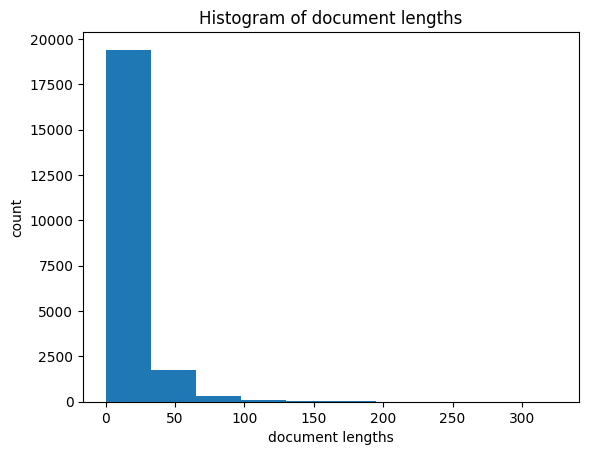

2024-02-27 01:02:13,312:INFO:tmtoolkit:processing vocabulary counts
INFO:tmtoolkit:processing vocabulary counts
2024-02-27 01:02:13,463:INFO:tmtoolkit:producing plot
INFO:tmtoolkit:producing plot


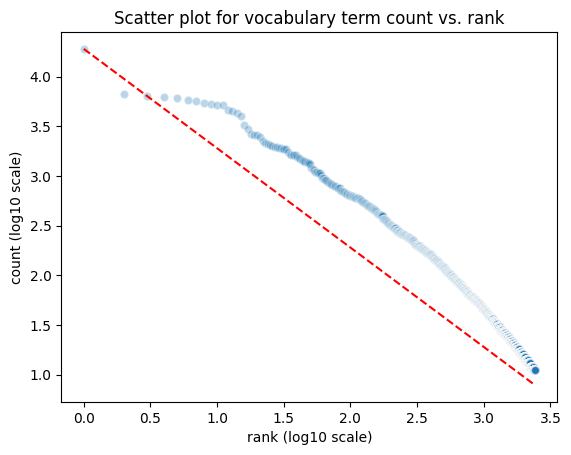

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plot_doc_lengths_hist(fig, ax, corpus, y_log=False)  # Use linear scale on y-axis
plt.show()

fig, ax = plt.subplots()
plot_ranked_vocab_counts(fig, ax, corpus, zipf=True)
plt.show()

In [ ]:
from copy import copy

smaller_corpus = copy(corpus)

to_lowercase(smaller_corpus)
remove_punctuation(smaller_corpus)
lemmatize(smaller_corpus)
filter_clean_tokens(smaller_corpus, remove_shorter_than=2,
                    remove_stopwords=True, remove_numbers=True)
remove_common_tokens(smaller_corpus, df_threshold=0.85)
remove_uncommon_tokens(smaller_corpus, df_threshold=0.005)

tokens_sm = doc_tokens(smaller_corpus, with_attr=True)
tokens_sm['reviews-B0000V9K32.A3BVWMS9I8OH8U']['lemma']

2024-02-27 01:02:39,300:INFO:tmtoolkit:creating Corpus instance with no documents
INFO:tmtoolkit:creating Corpus instance with no documents
2024-02-27 01:02:39,302:INFO:tmtoolkit:using serial processing
INFO:tmtoolkit:using serial processing
2024-02-27 01:02:42,252:INFO:tmtoolkit:replacing 213 token hashes
INFO:tmtoolkit:replacing 213 token hashes
2024-02-27 01:02:42,445:INFO:tmtoolkit:replacing 16 token hashes
INFO:tmtoolkit:replacing 16 token hashes
2024-02-27 01:02:44,892:INFO:tmtoolkit:filtered tokens by mask: num. tokens was 374165 and is now 374165
INFO:tmtoolkit:filtered tokens by mask: num. tokens was 374165 and is now 374165
2024-02-27 01:02:48,035:INFO:tmtoolkit:filtered tokens by mask: num. tokens was 374165 and is now 374165
INFO:tmtoolkit:filtered tokens by mask: num. tokens was 374165 and is now 374165
2024-02-27 01:02:51,148:INFO:tmtoolkit:filtered tokens by mask: num. tokens was 374165 and is now 306593
INFO:tmtoolkit:filtered tokens by mask: num. tokens was 374165 and 

['cute', 'fit', 'well', 'small', 'wrist', 'case', 'wear', 'love', 'watch']

2024-02-27 01:03:00,679:INFO:tmtoolkit:processing document lengths
INFO:tmtoolkit:processing document lengths
2024-02-27 01:03:00,698:INFO:tmtoolkit:producing plot
INFO:tmtoolkit:producing plot


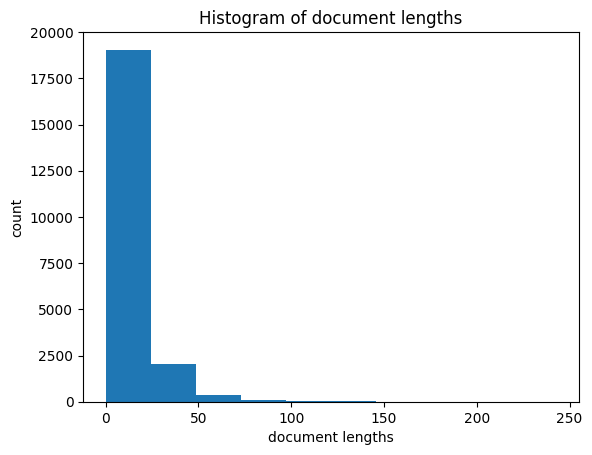

2024-02-27 01:03:00,887:INFO:tmtoolkit:processing vocabulary counts
INFO:tmtoolkit:processing vocabulary counts
2024-02-27 01:03:01,018:INFO:tmtoolkit:producing plot
INFO:tmtoolkit:producing plot


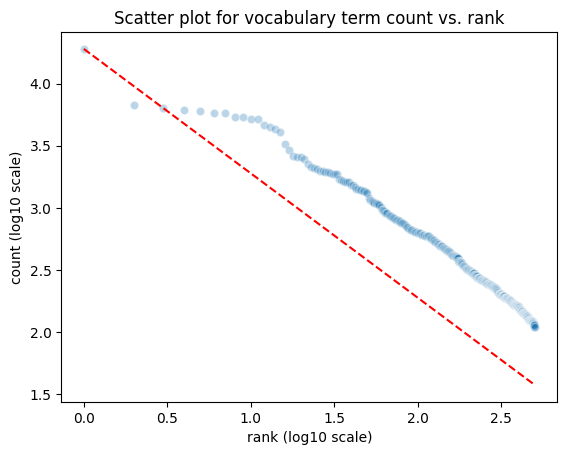

In [ ]:
fig, ax = plt.subplots()
plot_doc_lengths_hist(fig, ax, smaller_corpus, y_log=False)
plt.show()


fig, ax = plt.subplots()
plot_ranked_vocab_counts(fig, ax, smaller_corpus, zipf=True)
plt.show()

In [ ]:
from tmtoolkit.corpus import vocabulary_size

vocabulary_size(corpus), vocabulary_size(smaller_corpus)

(2412, 503)

In [ ]:
from tmtoolkit.corpus import dtm

dtm_bg, doc_labels_bg, vocab_bg = dtm(corpus, return_doc_labels=True, return_vocab=True)
dtm_sm, doc_labels_sm, vocab_sm = dtm(smaller_corpus, return_doc_labels=True, return_vocab=True)

dtm_bg, dtm_sm

2024-02-27 01:03:17,974:INFO:tmtoolkit:generating sparse DTM with 21569 documents and vocab size 2412
INFO:tmtoolkit:generating sparse DTM with 21569 documents and vocab size 2412
2024-02-27 01:03:29,900:INFO:tmtoolkit:generating sparse DTM with 21569 documents and vocab size 503
INFO:tmtoolkit:generating sparse DTM with 21569 documents and vocab size 503


(<21569x2412 sparse matrix of type '<class 'numpy.int32'>'
 	with 324317 stored elements in Compressed Sparse Row format>,
 <21569x503 sparse matrix of type '<class 'numpy.int32'>'
 	with 261582 stored elements in Compressed Sparse Row format>)

In [ ]:
vocab_sm[:10]

['Air',
 'Amazon',
 'Christmas',
 'Free',
 'Jordan',
 'Max',
 'NIKE',
 'Nike',
 'Nikes',
 'Pegasus']

In [ ]:
pickle.dump(doc_labels_bg, open('%s/doc_labels_bg.p' % working_directory, 'wb'))
pickle.dump(doc_labels_sm, open('%s/doc_labels_sm.p' % working_directory, 'wb'))

scipy.sparse.save_npz('%s/small_dtm.npz' % working_directory, dtm_sm)
scipy.sparse.save_npz('%s/big_dtm.npz' % working_directory, dtm_bg)

pickle.dump(vocab_bg, open('%s/big_vocab.p' % working_directory, 'wb'))
pickle.dump(vocab_sm, open('%s/small_vocab.p' % working_directory, 'wb'))

pickle.dump(corpus, open('%s/corpus.p' % working_directory, 'wb') )
pickle.dump(corpus, open('%s/smaller.p' % working_directory, 'wb') )

In [9]:
!pip uninstall -y numba
!pip uninstall -y tensorflow

!pip install lda
!pip install "tmtoolkit[recommended]"

Found existing installation: numba 0.58.1
Uninstalling numba-0.58.1:
  Successfully uninstalled numba-0.58.1
Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.8/349.8 kB 5.2 MB/s eta 0:00:00


In [10]:
try:
  import pyLDAvis
except:
  !pip install pyLDAvis==2.1.2
  import pyLDAvis
try:
  import tmtoolkit
except:
  !pip install -U "tmtoolkit[recommended]"
  import tmtoolkit


try:
  from lda import LDA
except:
  !pip install lda
  from lda import LDA

import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97718 sha256=a5a0bc96a31eda55d8ace9a9fb52b05f2921b6b661119e3e4d13be7e6a610404
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [11]:
doc_labels_bg = pickle.load(open('%s/doc_labels_bg.p' % working_directory, 'rb'))
doc_labels_sm = pickle.load(open('%s/doc_labels_sm.p' % working_directory, 'rb'))

dtm_bg = scipy.sparse.load_npz('%s/big_dtm.npz' % working_directory)
dtm_sm = scipy.sparse.load_npz('%s/small_dtm.npz' % working_directory)

vocab_bg = pickle.load(open('%s/big_vocab.p' % working_directory, 'rb'))
vocab_sm = pickle.load(open('%s/small_vocab.p' % working_directory, 'rb'))

corpus = pickle.load(open('%s/corpus.p' % working_directory, 'rb') )
smaller_corpus = pickle.load(open('%s/smaller.p' % working_directory, 'rb') )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dtms = {
    'bigger': dtm_bg
    ,'smaller': dtm_sm
}

const_params = {'n_iter': 500,'eta': 0.3, 'random_state': 20191122}

var_params = [{'n_topics': k, 'alpha': 1/k} for k in range(8,72,8)]

models = compute_models_parallel(dtms, constant_parameters=const_params, varying_parameters=var_params)

2024-02-27 00:20:27,765:INFO:tmtoolkit:initializing evaluation with sparse matrix of format `coo` and shape 21569x2428
INFO:tmtoolkit:initializing evaluation with sparse matrix of format `coo` and shape 21569x2428
2024-02-27 00:20:27,923:INFO:tmtoolkit:initializing evaluation with sparse matrix of format `coo` and shape 21569x508
INFO:tmtoolkit:initializing evaluation with sparse matrix of format `coo` and shape 21569x508
2024-02-27 00:20:27,925:INFO:tmtoolkit:init with 8 workers
INFO:tmtoolkit:init with 8 workers
2024-02-27 00:20:28,197:INFO:tmtoolkit:multiproc models: starting with 11 parameter sets on 2 datasets (= 22 tasks) and 8 processes
INFO:tmtoolkit:multiproc models: starting with 11 parameter sets on 2 datasets (= 22 tasks) and 8 processes
2024-02-27 00:20:28,204:INFO:tmtoolkit:fitting LDA model from package "lda" with parameters: {'n_topics': 8, 'alpha': 0.125, 'n_iter': 500, 'eta': 0.4, 'random_state': 20191122}
2024-02-27 00:20:28,205:INFO:tmtoolkit:fitting LDA model from 

In [ ]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

model_bg = models['bigger'][0][1]
model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_bg.topic_word_, vocab_bg, top_n=3), print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n=3)

topic_1
> #1. size (0.092160)
> #2. shoe (0.052587)
> #3. fit (0.037026)
topic_2
> #1. shoe (0.053440)
> #2. color (0.047076)
> #3. love (0.036162)
topic_3
> #1. wear (0.032504)
> #2. sock (0.024193)
> #3. good (0.022780)
topic_4
> #1. shoe (0.051632)
> #2. buy (0.020474)
> #3. 10 (0.017446)
topic_5
> #1. shoe (0.091904)
> #2. great (0.049122)
> #3. comfortable (0.046516)
topic_6
> #1. watch (0.058410)
> #2. time (0.015122)
> #3. bag (0.015077)
topic_7
> #1. shoe (0.076186)
> #2. foot (0.030789)
> #3. run (0.025222)
topic_8
> #1. love (0.042006)
> #2. great (0.034552)
> #3. product (0.026446)
topic_1
> #1. shoe (0.099948)
> #2. foot (0.045572)
> #3. run (0.034850)
topic_2
> #1. size (0.111726)
> #2. shoe (0.058693)
> #3. small (0.038513)
topic_3
> #1. sock (0.031835)
> #2. wear (0.030047)
> #3. good (0.027149)
topic_4
> #1. shoe (0.106462)
> #2. great (0.063204)
> #3. comfortable (0.052192)
topic_5
> #1. shoe (0.040367)
> #2. great (0.036069)
> #3. love (0.033761)
topic_6
> #1. watch (

(None, None)

# Evaluating Models with a constant beta and increasing k

In [13]:
from tmtoolkit.topicmod.tm_lda import evaluate_topic_models
from tmtoolkit.topicmod.evaluate import results_by_parameter

const_params = {
    'n_iter': 500,
    'random_state': 20191122,
    'eta': 0.3
}

var_params = [{'n_topics': k, 'alpha': 1/k} for k in range(8,72,8)]

eval_results = evaluate_topic_models(dtm_bg,
                                     varying_parameters=var_params,
                                     constant_parameters=const_params,
                                     coherence_mimno_2011_top_n=10,
                                     coherence_mimno_2011_include_prob=True,
                                     return_models=True)

2024-02-27 23:16:21,928:INFO:tmtoolkit:initializing evaluation with sparse matrix of format `coo` and shape 21569x2412
INFO:tmtoolkit:initializing evaluation with sparse matrix of format `coo` and shape 21569x2412
2024-02-27 23:16:21,935:INFO:tmtoolkit:init with 2 workers
INFO:tmtoolkit:init with 2 workers
2024-02-27 23:16:22,072:INFO:tmtoolkit:multiproc models: starting with 8 parameter sets on 1 datasets (= 8 tasks) and 2 processes
INFO:tmtoolkit:multiproc models: starting with 8 parameter sets on 1 datasets (= 8 tasks) and 2 processes
2024-02-27 23:16:22,102:INFO:tmtoolkit:fitting LDA model from package "lda" with parameters: {'n_topics': 8, 'alpha': 0.125, 'n_iter': 500, 'random_state': 20191122, 'eta': 0.3}
INFO:tmtoolkit:fitting LDA model from package "lda" with parameters: {'n_topics': 8, 'alpha': 0.125, 'n_iter': 500, 'random_state': 20191122, 'eta': 0.3}
2024-02-27 23:16:22,108:INFO:tmtoolkit:fitting LDA model from package "lda" with parameters: {'n_topics': 16, 'alpha': 0.062

In [14]:
eval_results_by_topics = results_by_parameter(eval_results, 'n_topics')
eval_results_by_topics[:10]

[(8,
  {'model': <lda.lda.LDA at 0x791b99421ff0>,
   'cao_juan_2009': 0.43718888838131964,
   'coherence_mimno_2011': -429.1737771434065}),
 (16,
  {'model': <lda.lda.LDA at 0x791b994218a0>,
   'cao_juan_2009': 0.3737849304060618,
   'coherence_mimno_2011': -423.1168133427985}),
 (24,
  {'model': <lda.lda.LDA at 0x791b99423a60>,
   'cao_juan_2009': 0.36073000362510166,
   'coherence_mimno_2011': -420.2739070767108}),
 (32,
  {'model': <lda.lda.LDA at 0x791b9f66a3e0>,
   'cao_juan_2009': 0.34438357716289647,
   'coherence_mimno_2011': -420.63109348755347}),
 (40,
  {'model': <lda.lda.LDA at 0x791b9f66a3b0>,
   'cao_juan_2009': 0.34200740459910006,
   'coherence_mimno_2011': -417.09404259028526}),
 (48,
  {'model': <lda.lda.LDA at 0x791b9f66a410>,
   'cao_juan_2009': 0.3353314030411791,
   'coherence_mimno_2011': -420.79407707135323}),
 (56,
  {'model': <lda.lda.LDA at 0x791b9f66a1d0>,
   'cao_juan_2009': 0.3284007308302681,
   'coherence_mimno_2011': -424.42933952983964}),
 (64,
  {'mod

# Model Selection (Finding 'k')

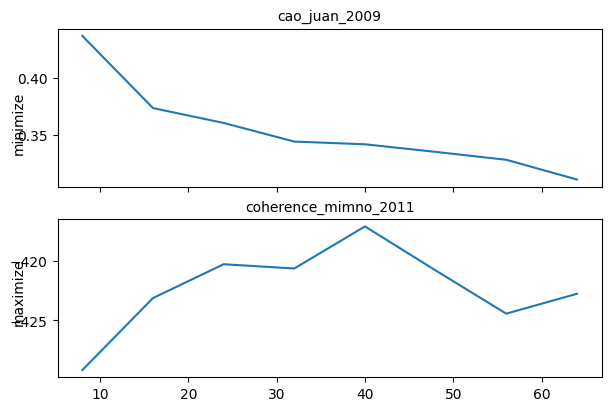

In [15]:
from tmtoolkit.topicmod.visualize import plot_eval_results

plot_eval_results(eval_results_by_topics);

In [16]:
best_tm = [m for k, m in eval_results_by_topics if k == 64][0]['model']
best_tm.n_topics, best_tm.alpha, best_tm.eta

(64, 0.015625, 0.3)

In [17]:
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words

vocab_bg = np.array(vocab_bg)
doc_lengths_bg = doc_lengths(dtm_bg)
topic_labels = generate_topic_labels_from_top_words(
    best_tm.topic_word_,
    best_tm.doc_topic_,
    doc_lengths_bg,
    np.array(vocab_bg),
    lambda_=0.6
)

topic_labels[:10]

2024-02-27 23:33:15,929:INFO:tmtoolkit:calculating topic-word relevance matrix
INFO:tmtoolkit:calculating topic-word relevance matrix
2024-02-27 23:33:15,959:INFO:tmtoolkit:identifying most relevant words per topic
INFO:tmtoolkit:identifying most relevant words per topic
2024-02-27 23:33:16,041:INFO:tmtoolkit:building topic labels
INFO:tmtoolkit:building topic labels


array(['1_shoe_walk_feel', '2_sock_wash_dry', '3_watch_easy_read',
       '4_size_small_big', '5_year_pair_wear', '6_NIKE_SHOE_LOVE',
       '7_real_fake_cheap', '8_toe_tight_narrow', '9_use_run_gym',
       '10_cleat_soccer_play'], dtype='<U29')

In [72]:
from tmtoolkit.topicmod.model_io import ldamodel_top_topic_words

top_topic_word = ldamodel_top_topic_words(best_tm.topic_word_,
                                          vocab_bg,
                                          row_labels=topic_labels)
top_topic_word.head(20)


,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
topic,,,,,,,,,,
1_shoe_walk_feel,shoe (0.09306),comfortable (0.04346),feel (0.03931),like (0.03572),wear (0.03549),walk (0.0346),foot (0.03145),great (0.0291),run (0.02809),love (0.02551)
2_sock_wash_dry,sock (0.1491),fit (0.03155),foot (0.03014),wear (0.02646),great (0.02223),good (0.01912),like (0.01686),comfortable (0.01615),buy (0.01488),wash (0.01135)
3_watch_easy_read,watch (0.06723),easy (0.02453),time (0.02008),read (0.01675),like (0.0163),band (0.01519),nice (0.0123),light (0.01141),face (0.01119),big (0.01074)
4_size_small_big,size (0.1253),shoe (0.06755),small (0.06069),order (0.04356),big (0.03849),run (0.03049),large (0.02199),half (0.02072),little (0.01856),buy (0.01768)
5_year_pair_wear,pair (0.06567),wear (0.05815),year (0.04881),buy (0.03978),shoe (0.03542),comfortable (0.0312),love (0.02849),old (0.02593),time (0.02443),son (0.02292)
6_NIKE_SHOE_LOVE,NIKE (0.05634),SHOE (0.02213),shoe (0.01899),GREAT (0.01742),LOVE (0.01702),love (0.01466),AIR (0.01466),wear (0.01427),COMFORTABLE (0.01388),SIZE (0.01309)
7_real_fake_cheap,shoe (0.04372),like (0.03512),look (0.03361),Nike (0.03226),real (0.01995),quality (0.0159),cheap (0.01455),buy (0.01405),feel (0.01287),material (0.01253)
8_toe_tight_narrow,shoe (0.055),foot (0.04027),little (0.03234),toe (0.03148),size (0.03036),tight (0.02987),wear (0.02962),fit (0.0269),narrow (0.02232),bit (0.02195)
9_use_run_gym,shoe (0.07612),run (0.0456),wear (0.04274),comfortable (0.03913),use (0.03643),good (0.03162),great (0.02726),walk (0.0241),work (0.02365),gym (0.02139)


# Below are the topic scores for each review from which I will find the best fitting topic

In [73]:
from tmtoolkit.topicmod.model_io import ldamodel_full_doc_topics

df_doc_topic = ldamodel_full_doc_topics(best_tm.doc_topic_,
                                        doc_labels_bg,
                                        topic_labels=topic_labels)

df_doc_topic.iloc[:10, :5]

,_doc,1_shoe_walk_feel,2_sock_wash_dry,3_watch_easy_read,4_size_small_big
0,reviews-B0000V9K32.A3BVWMS9I8OH8U,0.001420,0.001420,0.001420,0.001420
1,reviews-B0000V9K32.ACT5DY536GISV,0.001116,0.001116,0.001116,0.001116
2,reviews-B0000V9K3W.A5RZS69KSJH00,0.001202,0.001202,0.155048,0.001202
3,reviews-B0000V9K46.A3F8O512N9UNVM,0.002232,0.002232,0.002232,0.002232
4,reviews-B0000V9KNM.A2EAKTCKFRF7A4,0.001420,0.001420,0.001420,0.092330
5,reviews-B0000V9KRI.A1BEBWGPSB2DLM,0.001736,0.001736,0.001736,0.001736
6,reviews-B0000V9KRI.A1EDPEDXSQ78G4,0.001302,0.001302,0.001302,0.001302
7,reviews-B0000V9KRI.AR7L2ZP173QEE,0.001202,0.001202,0.001202,0.001202
8,reviews-B0000V9KRS.A1UY8BIKG0VR12,0.000977,0.000977,0.000977,0.000977
9,reviews-B0000V9KRS.A2RBU58FQTO2MV,0.001563,0.001563,0.001563,0.001563


# Preparing DF for merge with ASIN and topic

In [77]:
df_doc_topic['_doc'] = df_doc_topic['_doc'].str.replace('reviews-', '')

top_topic = pd.DataFrame(df_doc_topic.set_index('_doc').idxmax(axis=1)).reset_index()
top_topic.columns = ['doc_id', 'topic']
top_topic.head()

,doc_id,topic
0,B0000V9K32.A3BVWMS9I8OH8U,48_watch_wrist_small
1,B0000V9K32.ACT5DY536GISV,55_black_color_red
2,B0000V9K3W.A5RZS69KSJH00,28_return_order_send
3,B0000V9K46.A3F8O512N9UNVM,12_product_quality_good
4,B0000V9KNM.A2EAKTCKFRF7A4,31_compliment_love_lot


In [79]:
df_reviews.reset_index(inplace=True)
df_reviews.head()

,doc_id,reviewText
0,B0000V9K32.ACT5DY536GISV,the colour i received is not blue as shown but...
1,B0000V9K32.A3BVWMS9I8OH8U,Very cute and is really practical. Fits better...
2,B0000V9K3W.A5RZS69KSJH00,The watch was exactly what i ordered and I got...
3,B0000V9K46.A3F8O512N9UNVM,"This product came promptly and as described, p..."
4,B0000V9KNM.A2EAKTCKFRF7A4,Why isn't Nike making these anymore? I love t...


# Sample of reviews with top 3 topics and score

In [24]:
from tmtoolkit.topicmod.model_io import print_ldamodel_doc_topics

# subsetting new_doc_topic and doc_labels to get only the first
# five documents
print_ldamodel_doc_topics(best_tm.doc_topic_[:20, :], doc_labels_bg[:20],
                          val_labels=topic_labels)

reviews-B0000V9K32.A3BVWMS9I8OH8U
> #1. 48_watch_wrist_small (0.910511)
> #2. 31_compliment_love_lot (0.001420)
> #3. 29_clean_white_dirty (0.001420)
reviews-B0000V9K32.ACT5DY536GISV
> #1. 55_black_color_red (0.572545)
> #2. 34_gift_husband_love (0.215402)
> #3. 62_old_school_son (0.072545)
reviews-B0000V9K3W.A5RZS69KSJH00
> #1. 28_return_order_send (0.616587)
> #2. 3_watch_easy_read (0.155048)
> #3. 37_shirt_short_bra (0.078125)
reviews-B0000V9K46.A3F8O512N9UNVM
> #1. 12_product_quality_good (0.859375)
> #2. 64_find_hard_Amazon (0.002232)
> #3. 17_sunglass_glass_lense (0.002232)
reviews-B0000V9KNM.A2EAKTCKFRF7A4
> #1. 31_compliment_love_lot (0.819602)
> #2. 4_size_small_big (0.092330)
> #3. 17_sunglass_glass_lense (0.001420)
reviews-B0000V9KRI.A1BEBWGPSB2DLM
> #1. 15_price_good_quality (0.335069)
> #2. 35_squeak_apart_month (0.335069)
> #3. 29_clean_white_dirty (0.112847)
reviews-B0000V9KRI.A1EDPEDXSQ78G4
> #1. 9_use_run_gym (0.667969)
> #2. 23_watch_button_feature (0.251302)
> #3. 64

In [80]:
df_reviews_topic = df_reviews.merge(top_topic, on='doc_id', how='left')
df_reviews_topic.head(20)

,doc_id,reviewText,topic
0,B0000V9K32.ACT5DY536GISV,the colour i received is not blue as shown but...,55_black_color_red
1,B0000V9K32.A3BVWMS9I8OH8U,Very cute and is really practical. Fits better...,48_watch_wrist_small
2,B0000V9K3W.A5RZS69KSJH00,The watch was exactly what i ordered and I got...,28_return_order_send
3,B0000V9K46.A3F8O512N9UNVM,"This product came promptly and as described, p...",12_product_quality_good
4,B0000V9KNM.A2EAKTCKFRF7A4,Why isn't Nike making these anymore? I love t...,31_compliment_love_lot
5,B0000V9KRI.AR7L2ZP173QEE,"good price, very good material and excellent d...",12_product_quality_good
6,B0000V9KRI.A1BEBWGPSB2DLM,"I mean, Roxy rocks, but I'm kinda dissapointed...",15_price_good_quality
7,B0000V9KRI.A1EDPEDXSQ78G4,"I love this watch, i use every day, every wher...",9_use_run_gym
8,B0000V9KRS.A2RBU58FQTO2MV,I totally love this watch. It is much nicer an...,15_price_good_quality
9,B0000V9KRS.A1UY8BIKG0VR12,"when it arrived, it had a dead battery--SO, I ...",50_true_fit_size


In [81]:
#df_reviews.reset_index(inplace=True)
df_reviews_topic['doc_id'] = df_reviews_topic['doc_id'].str.split('.').str[0]


# Below are all the reviews with the ASIN (doc_id) and the top scoring topic from the model


In [86]:
df_reviews_topic.head(100)

,doc_id,reviewText,topic
0,B0000V9K32,the colour i received is not blue as shown but...,55_black_color_red
1,B0000V9K32,Very cute and is really practical. Fits better...,48_watch_wrist_small
2,B0000V9K3W,The watch was exactly what i ordered and I got...,28_return_order_send
3,B0000V9K46,"This product came promptly and as described, p...",12_product_quality_good
4,B0000V9KNM,Why isn't Nike making these anymore? I love t...,31_compliment_love_lot
...,...,...,...
95,B0006MFAWK,"I bought this for my 16 year old cousin, and I...",7_real_fake_cheap
96,B0006NGUE6,I received these shoes last week. Aside from t...,38_foot_arch_shoe
97,B0006NGUE6,a good looking shoe but not to be recommended ...,25_size_half_small
98,B0006NGUE6,Very nice and comfortable golf shoes!! This wa...,56_great_price_shoe


# Below are 5 topics summarized in 1-2 sentences with the top ranked words

In [28]:
from tmtoolkit.topicmod.model_io import ldamodel_top_topic_words

top_topic_word = ldamodel_top_topic_words(best_tm.topic_word_,
                                          vocab_bg,
                                          row_labels=topic_labels)
top_topic_word[top_topic_word.index == '48_watch_wrist_small']

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
topic,,,,,,,,,,
48_watch_wrist_small,watch (0.09975),wrist (0.0308),small (0.02756),look (0.02432),like (0.01826),fit (0.01361),Nike (0.01341),size (0.01239),band (0.01239),great (0.01199)


### The watch looks greats but fits better on a smaller wrist
ASExample ASININ: B0000V9K32

In [29]:
top_topic_word[top_topic_word.index == '31_compliment_love_lot']

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
topic,,,,,,,,,,
31_compliment_love_lot,love (0.06438),shoe (0.059),comfortable (0.03954),color (0.0367),compliment (0.03506),wear (0.03431),get (0.03176),great (0.03102),lot (0.03057),look (0.02922)


### It is a great watch and the watch gets complimented often

Example ASIN: B00012O2O2

In [30]:
top_topic_word[top_topic_word.index == '3_watch_easy_read']

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
topic,,,,,,,,,,
3_watch_easy_read,watch (0.06723),easy (0.02453),time (0.02008),read (0.01675),like (0.0163),band (0.01519),nice (0.0123),light (0.01141),face (0.01119),big (0.01074)


### Comfortable watch that is easy to take on and off, but dispite having a large display it can be difficult to read

Example ASIN: B000A8BTO8

In [83]:
top_topic_word[top_topic_word.index == '15_price_good_quality']

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
topic,,,,,,,,,,
15_price_good_quality,good (0.06374),price (0.04922),look (0.03882),quality (0.03453),shoe (0.03024),think (0.02265),like (0.02067),nice (0.01853),little (0.01853),buy (0.01655)


### Good quality watch that looks great

Example ASIN: B0002764JW

In [88]:
top_topic_word[top_topic_word.index == '34_gift_husband_love']


,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
topic,,,,,,,,,,
34_gift_husband_love,love (0.08042),buy (0.06135),gift (0.03746),say (0.03717),husband (0.03447),shoe (0.03262),comfortable (0.0275),fit (0.02679),like (0.02579),son (0.02323)


### Shoes are a great gift for a family member because they are comfortable and fit well

Example ASIN: 	B0002IC3VY